In [17]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from beakerx import *
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import h5py
import os
from tqdm import tqdm
import scipy
from scipy.misc import imread,imsave
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook as tqdm

Populating the interactive namespace from numpy and matplotlib


In [9]:
cd /home/xupeng/projects/membrane

/home/xupeng/projects/membrane


In [2]:
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML, Image
from ipywidgets import interact,Dropdown,IntSlider,FloatRangeSlider, FloatSlider, RadioButtons
rc('animation', html='html5')

In [3]:
colorsgallery  = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229),
            (240,128,128),(233,150,122),(250,128,114),(255,160,122),
            (50,205,50),(144,238,144),(152,251,152),(143,188,143),
            (0,250,154),(0,255,127),(102,205,170),(60,179,113),
            (70,130,180),(100,149,237),(0,191,255),(30,144,255),
            (173,216,230),(135,206,235),(199,21,133),(219,112,147),
            (255,20,147),(255,105,180),(255,182,193),(255,192,203),(250,235,215),
                          (31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229),
            (240,128,128),(233,150,122),(250,128,114),(255,160,122),
            (50,205,50),(144,238,144),(152,251,152),(143,188,143),
            (0,250,154),(0,255,127),(102,205,170),(60,179,113),
            (70,130,180),(100,149,237),(0,191,255),(30,144,255),
            (173,216,230),(135,206,235),(199,21,133),(219,112,147),
            (255,20,147),(255,105,180),(255,182,193),(255,192,203),(250,235,215)])/255.

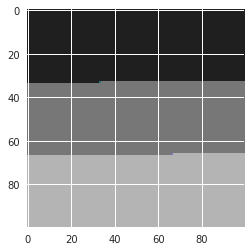

In [54]:
imshow(np.repeat(np.array([31, 119, 180]),10000).reshape(100,100,3))

In [55]:
np.repeat(np.array([31, 119, 180]),10000).shape

(30000,)

In [45]:
def transform_rgb(img):
    #print (num)
    #rgbarr = np.ndarray([num*3])
    #for i in range(num*3):
      #  rgbarr[i] = np.random.uniform(0,1)
    #rgbarr = rgbarr.reshape(-1,3)
    image = np.zeros([img.shape[0],img.shape[1],3])
    #sumimg = np.sum(img.reshape(-1,3),axis=1)
    uniqueind = np.unique(img)
    print (uniqueind,uniqueind[10])
    num = uniqueind.shape[0]
    for i in tqdm(np.arange(0,num-1)):
        #print ()
        ind1,ind2 = np.where(img==uniqueind[i]+1)
        #for (j,k) in zip(ind1,ind2):
            #print (j,k)
        image[ind1,ind2,:] = colorsgallery[i]
    #print (sumimg.shape)
    image[np.where(img==0)] = [1,1,1]
    return image.reshape(img.shape[0],img.shape[1],3)

In [40]:
with h5py.File('data/top_view.h5') as f:
    img = f['main'][:]

In [41]:
img.dtype

dtype('uint8')

In [46]:
transformed = transform_rgb(img)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 33 34 35 36] 10


In [47]:
transformed.shape

(6736, 12482, 3)

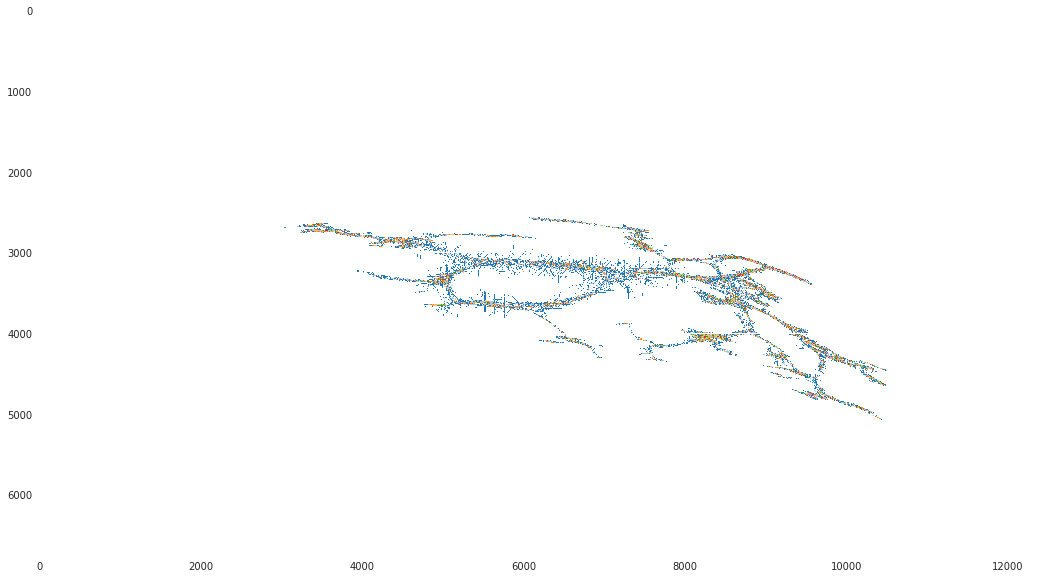

In [50]:
fig,ax=plt.subplots(1,figsize=(20,10))
ax.imshow(transformed)

In [51]:
imsave('data/topview.png',  transformed)

In [58]:
colorsgallery_samecolor = np.array([colorsgallery[0]*(1-0.02*i) for i in range(50)])

In [74]:
def transform_rgb_(img):
    #print (num)
    #rgbarr = np.ndarray([num*3])
    #for i in range(num*3):
      #  rgbarr[i] = np.random.uniform(0,1)
    #rgbarr = rgbarr.reshape(-1,3)
    image = np.zeros([img.shape[0],img.shape[1],3])
    #sumimg = np.sum(img.reshape(-1,3),axis=1)
    uniqueind = np.unique(img)
    print (uniqueind,uniqueind[10])
    num = uniqueind.shape[0]
    for i in tqdm(np.arange(0,num-1)):
        #print ()
        ind1,ind2 = np.where(img==uniqueind[i]+1)
        #for (j,k) in zip(ind1,ind2):
            #print (j,k)
        image[ind1,ind2,:] = colorsgallery_samecolor[i]
    #print (sumimg.shape)
    image[np.where(img==0)] = [1,1,1]
    return image.reshape(img.shape[0],img.shape[1],3)

In [75]:
transformed = transform_rgb_(img)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 33 34 35 36] 10


(array([6.76994e+05, 3.31491e+05, 1.84173e+05, 0.00000e+00, 1.06959e+05,
        6.25490e+04, 0.00000e+00, 3.81270e+04, 2.37700e+04, 0.00000e+00,
        1.55460e+04, 1.01790e+04, 6.76500e+03, 0.00000e+00, 4.69100e+03,
        3.38000e+03, 0.00000e+00, 2.27000e+03, 1.61900e+03, 0.00000e+00,
        1.16300e+03, 8.38000e+02, 6.13000e+02, 0.00000e+00, 4.38000e+02,
        3.05000e+02, 0.00000e+00, 2.16000e+02, 1.52000e+02, 0.00000e+00,
        1.08000e+02, 9.30000e+01, 6.60000e+01, 0.00000e+00, 3.20000e+01,
        3.10000e+01, 0.00000e+00, 2.10000e+01, 1.30000e+01, 0.00000e+00,
        1.50000e+01, 9.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 2.00000e+00, 3.00000e+00, 2.00000e+00]),
 array([ 1. ,  1.7,  2.4,  3.1,  3.8,  4.5,  5.2,  5.9,  6.6,  7.3,  8. ,
         8.7,  9.4, 10.1, 10.8, 11.5, 12.2, 12.9, 13.6, 14.3, 15. , 15.7,
        16.4, 17.1, 17.8, 18.5, 19.2, 19.9, 20.6, 21.3, 22. , 22.7, 23.4,
        24.1, 24.8, 25.5, 26.2, 26.9, 27.6, 28

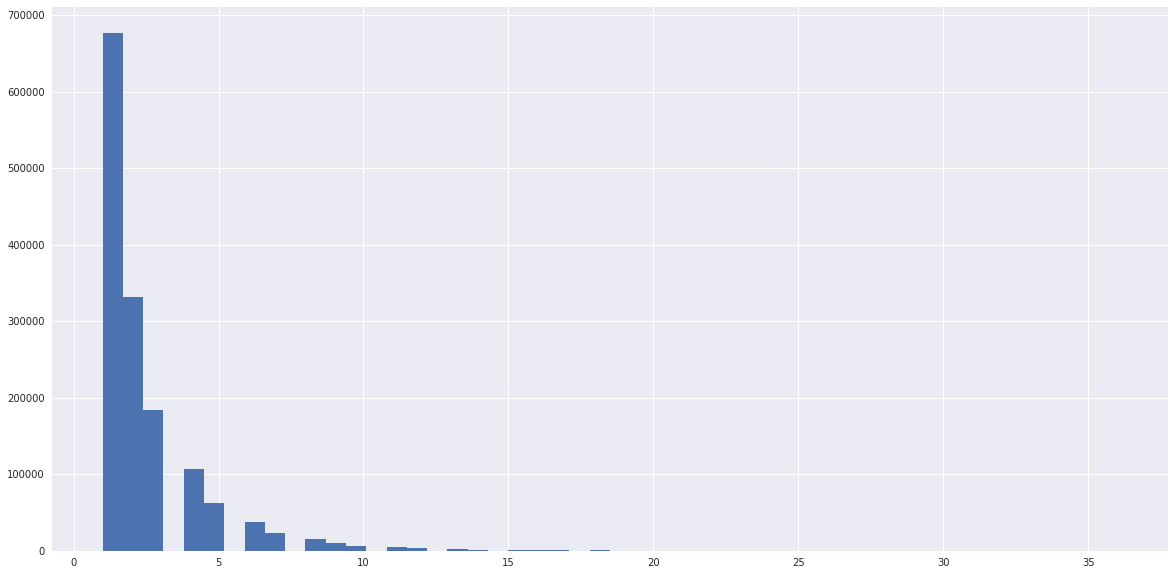

In [77]:
fig,ax=plt.subplots(1,figsize=(20,10))
ax.hist(img[img!=0].ravel(),bins=50)

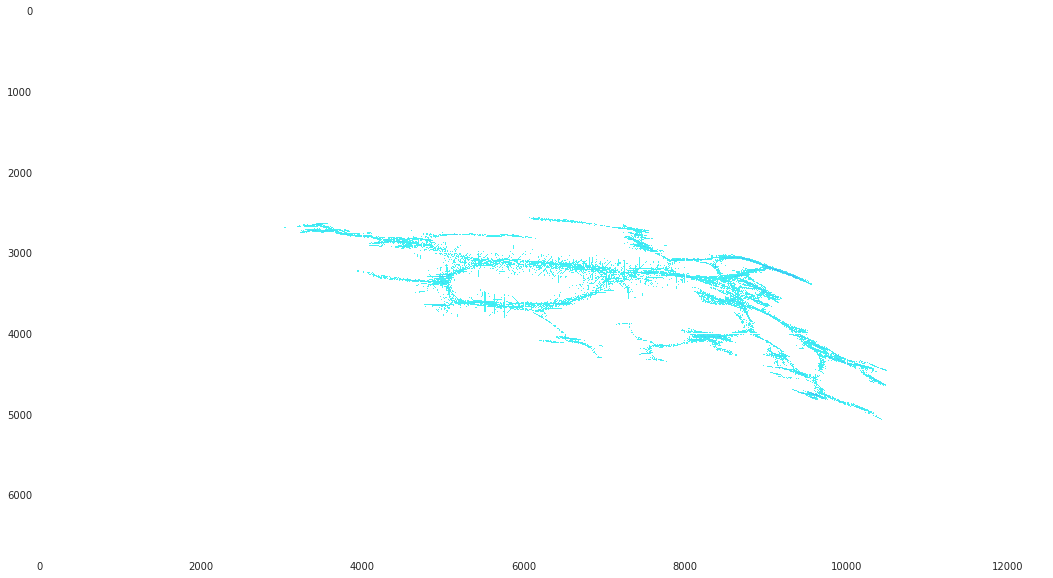

In [79]:
fig,ax=plt.subplots(1,figsize=(20,10))
ax.imshow(transformed)

In [78]:
imsave('data/topview__.png',  transformed)

In [ ]:
66, 244, 244
65 ,71,244

In [64]:
244-71

173

In [65]:
colorsgallery_samecolor = np.array([np.array([66, 244 -4*i, 244]) for i in range(40)])

In [73]:
colorsgallery_samecolor  = colorsgallery_samecolor/255.